# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader, DataMultiverse
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [8]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-07-01 downloaded.
kospi200_prices_250701.csv saved
df_prices updated
Execution time of download: 29 secs


## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-06-30 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-07-01 downloaded.
etfs_weather_250701.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## ETF

In [14]:
tickers = [
    '261240', '292560'
]

In [19]:
etf = PM.create_universe('UV_ETF')

3 securities from 2022-01-03 to 2025-07-02 uploaded.
Price data loaded


In [20]:
etf.get_names('selected')

0) 329750: TIGER 미국달러단기채권액티브
1) 261240: KODEX 미국달러선물
2) 440650: ACE 미국달러단기채권액티브

In [34]:
#PM.review_universe('UV_WTR')

In [21]:
kw = dict(
    #n_years=3, 
    n_years=10, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers
    #tickers = 'selected'
)
etf.download(**kw) if WidgetUniverse.values(0) else None

... done
3 securities from 2016-12-27 to 2025-07-02 downloaded.
etfs_all_250702.csv saved
df_prices updated
Execution time of download: 0 secs


## FUND

In [4]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

33 securities from 2015-01-02 to 2025-07-02 uploaded.
Master data for 324 funds loaded.
Price data loaded


In [23]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [24]:
# FISA
tickers += ['K55105CH3411', 'K55223BU8809', 'K55105BU7648', 'K55301BX0493', 'K55235CI9634',
            'K55306BT9453', 'K55236BG3001', 'K55101E95114', 'K55101E95247', 'K55235B96163', 'KR5235AK9691', 'K55236BG3274']
len(tickers)

36

In [25]:
kw = dict(
    start_date = '2024-06-01',
    #n_years = 10,
    #close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 324 funds loaded.
35 tickers set to download


100%|███████████████████████████████████████████████████████████████| 35/35 [05:27<00:00,  9.35s/it]

2 tickers failed for conversion
... done
33 securities from 2015-01-02 to 2025-07-02 downloaded.
funds_prices_250702.csv saved
df_prices updated
Execution time of download: 5 mins


In [23]:
_ = fund.save()

ERROR: failed to save as funds_prices_250701.csv exists


In [24]:
#fund.portfolio_data['universe']

### Master

In [64]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210BR6480,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210BR6522,신한마음편한TDF2035증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105BC8507,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55105BC8523,삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]_Ce,삼성증권,일반,삼성,주식혼합,TDF,글로벌
K55235CI9634,피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e,기업은행,퇴직연금,피델리티,주식,주식,인도


In [65]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [66]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [67]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

0

In [68]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [69]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.44it/s]

1.0 secs elapsed, 0.0 secs paused (0.0%)


### Monthly

In [111]:
fund = PM.create_universe('UV_FNDM')

315 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [74]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [75]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250620.csv loaded
28 securities from 2023-03-29 to 2025-06-19 uploaded.
Master data for 324 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [77]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

28 securities from 2023-03-29 to 2025-06-19 uploaded.
Master data for 324 funds loaded.
Price data loaded
Master data for 324 funds loaded.
Cost data transaction_cost_250514.csv loaded
Cost data saved to transaction_cost_250620.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

33 securities from 2015-01-02 to 2025-07-02 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded


In [5]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']
#tickers = ['K55105CH3411']

In [6]:
fund.get_names(tickers)

0) K55301BU6253: 미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e
1) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce
2) K55107BU0252: 우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e

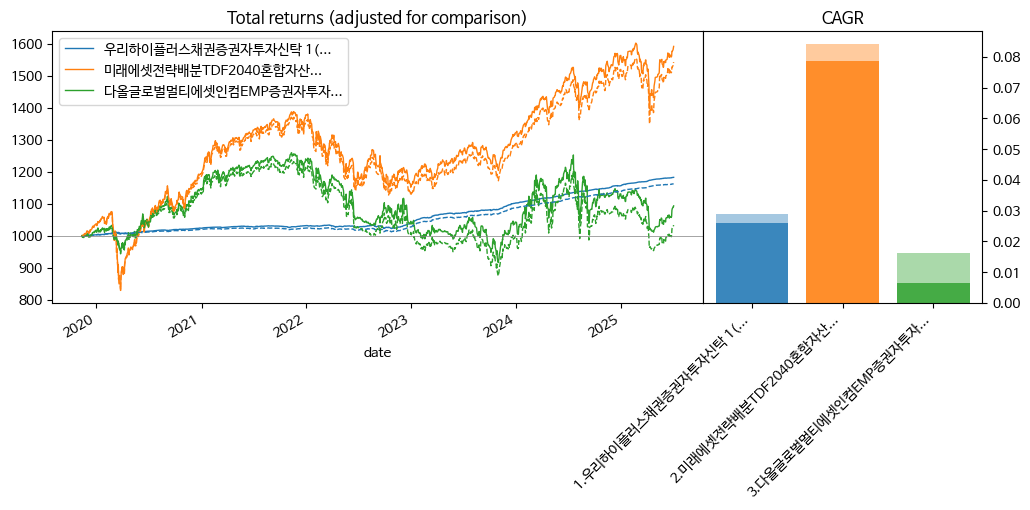

In [7]:
fund.plot(tickers, cost=cost, base=1000)

## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## FCTR

In [12]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2022-01-03 to 2025-03-25 uploaded.
ERROR: Failed to get ticker names as Too Many Requests. Rate limited. Try after a while.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## LIQ

In [13]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [16]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded


In [17]:
#liq.get_names()

In [19]:
kw = dict(
    n_years = 3, 
    tickers = selected, #selected,
    close_today = WidgetUniverse.values(1),
    overwrite = WidgetUniverse.values(2),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

ERROR: Failed to get ticker names
Execution time of download: 11 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [43]:
WidgetUniverse

In [44]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-09 loaded


In [45]:
start_fr = '2024-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:13<00:00,  2.17s/it]

7.2 mins elapsed, 16.0 secs paused (3.7%)
Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 downloaded
kospi200_ratios_250627.csv saved


In [9]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [10]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-09
Price: 2022-01-03 ~ 2025-05-09


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per2_250509.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [13]:
#pm.load('LIQ')
pm.load(pf_srt, pf_sds, pf_fxm)

SRT: imported
SDS: imported
FXM: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


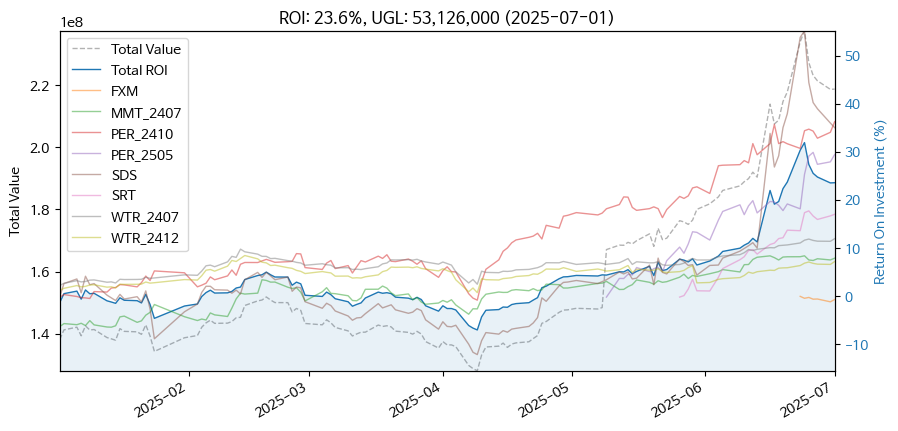

In [14]:
start_date='2025-01-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [15]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [16]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,FXM,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL
start,2025-06-23,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18
end,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01
buy,"998,598","69,808,056","16,472,520","17,985,321","97,106,466","2,138,730","10,364,836","10,516,562","225,391,090"
sell,0.0,"56,214,884","2,617,050",0.0,0.0,0.0,"942,797",0.0,"59,774,732"
value,"991,688","19,106,647","19,825,882","23,277,034","131,106,005","2,502,724","10,659,729","11,273,067","218,742,776"
ugl,"-6,910","5,513,475","5,970,412","5,291,713","33,999,539","363,994","1,237,691","756,505","53,126,418"
roi,-0.00692,0.079,0.362,0.294,0.35,0.17,0.119,0.0719,0.236


In [17]:
pm.performance_stats()

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe


,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,SRT,SDS,FXM
start,2024-07-23,2024-10-18,2025-05-12,2024-07-19,2024-12-19,2025-05-27,2025-01-03,2025-06-24
end,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01
total_return,0.022336,0.354825,0.248081,0.119597,0.073865,0.168699,0.315625,-0.002569
cagr,0.023803,0.542288,4.047228,0.126269,0.143589,4.087733,0.750207,-0.125592
calmar,0.079019,6.102351,190.163626,1.901161,2.017299,174.865995,4.610427,-13.713894
max_drawdown,-0.301226,-0.088865,-0.021283,-0.066417,-0.071179,-0.023376,-0.16272,-0.009158
avg_drawdown,-0.106053,-0.020958,-0.011806,-0.012793,-0.010396,-0.011969,-0.055075,-0.009158
avg_drawdown_days,111.0,9.142857,3.625,22.071429,17.666667,3.5,13.909091,5.0
daily_vol,0.277149,0.211832,0.276639,0.080808,0.100169,0.201356,0.481849,0.067962
daily_sharpe,0.230684,2.244658,6.088964,1.59261,1.484575,8.607133,1.452424,-1.879748


Custom category loaded: portfolio2


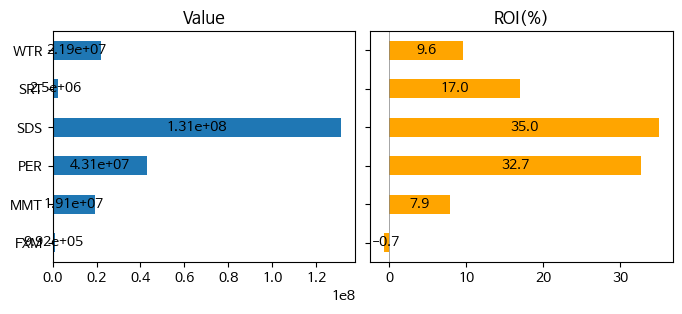

In [18]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*diversification metrics*

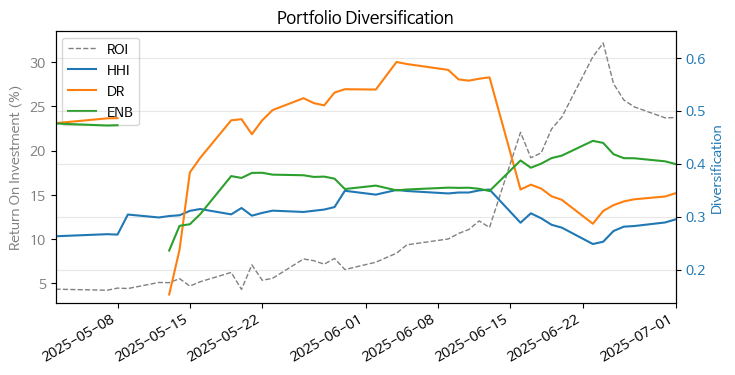

In [19]:
pfs = ['MMT', 'PER', 'WTR', 'SDS']
pm.diversification_history(*pfs, start_date='2025-05-01')

*print summary for google sheet 금융자산운용*

In [8]:
pm.util_print_summary(date=w_date.value)

2025-06-02, MMT, 2407, , , , 평가, , 61756350, 46784778, 17855971, 2884398, 0.0467
2025-06-02, PER, 2410, , , , 평가, , 12249374, 2617050, 10504989, 872665, 0.0712
2025-06-02, PER, 2505, , , , 평가, , 16292303, 0.0, 17685183, 1392880, 0.0855
2025-06-02, SRT, , , , 평가, , 2138820, 0.0, 2165987, 27167, 0.0127
2025-06-02, WTR, 2407, , , , 평가, , 10364836, 942797, 10202619, 780581, 0.0753
2025-06-02, WTR, 2412, , , , 평가, , 10516562, 0.0, 10816338, 299776, 0.0285


### All Funds

In [20]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


In [21]:
start_date='2024-07-01'
#pm.plot(start_date=start_date, roi=False)

In [22]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-07-01,2025-07-01,2025-07-01,2025-07-01,2025-07-01
buy,"31,176,035","9,990,000","10,652,630","48,148,612","99,967,277"
sell,"-14,161",0.0,"-3,481","-102,860","-120,502"
value,"32,231,795","10,373,311","10,746,925","48,503,448","101,855,479"
ugl,"1,041,599","383,311","90,814","251,976","1,767,700"
roi,0.0334,0.0384,0.00853,0.00523,0.0177


In [23]:
pm.performance_stats()

,TDF_2406,HANA_2408,SAVE_2503,FISA_2504
start,2024-06-20,2024-08-02,2025-03-18,2025-04-29
end,2025-07-01,2025-07-01,2025-07-01,2025-07-01
total_return,0.00603,0.036922,0.006405,0.03535
cagr,0.005857,0.040569,0.022458,0.223125
calmar,0.044143,2.269639,0.459372,68.96732
max_drawdown,-0.132685,-0.017875,-0.048888,-0.003235
avg_drawdown,-0.034465,-0.003256,-0.017475,-0.001027
avg_drawdown_days,48.857143,10.5,24.75,3.571429
daily_vol,0.098254,0.023663,0.075291,0.024876
daily_sharpe,0.111157,1.783091,0.342548,8.814201


In [28]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
category = 'asset'

Custom category loaded: account, asset, manager, region, seller, strategy


In [82]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)
category = 'name2'

Custom category loaded: name2


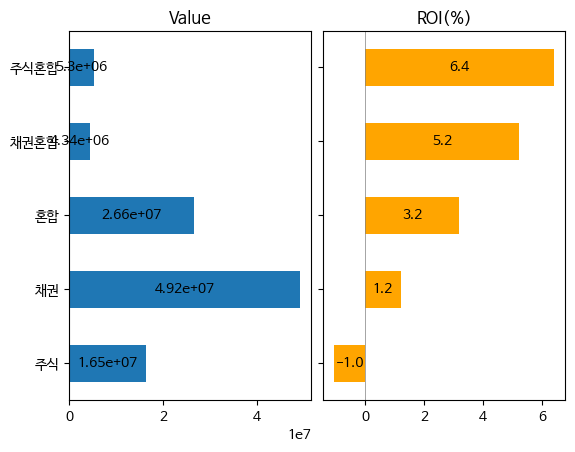

In [29]:
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

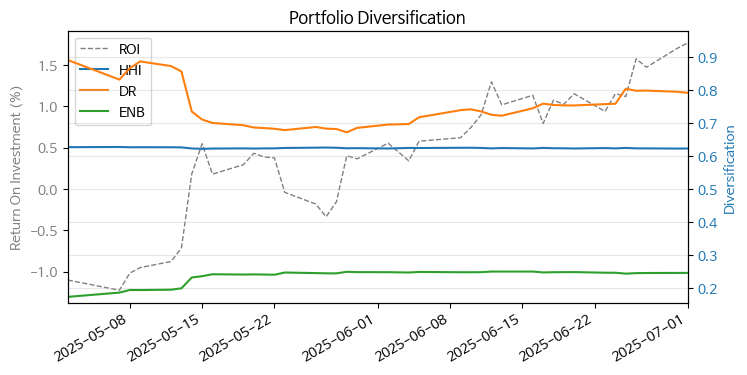

In [30]:
pm.diversification_history(start_date='2025-05-01')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Research

## Data

In [4]:
tickers = ['K55105CH3411', '329750', '261240', '440650']
n_years = 20

In [5]:
file = 'research_etf'
retf = PM.create_universe('UV_ETF', file=file)

3 securities from 2016-12-27 to 2025-07-03 uploaded.
Price data loaded


In [6]:
#retf.download(tickers=tickers, n_years=n_years)

In [7]:
file = 'research_fund'
rfund = PM.create_universe('UV_FUND', file=file)

1 securities from 2019-01-21 to 2025-07-03 uploaded.
Master data for 324 funds loaded.
Price data loaded


In [8]:
#rfund.download(tickers=tickers, n_years=n_years)

## Compare

In [9]:
univ = ['ETF', 'FUND']
inst = [retf, rfund]
dm = DataMultiverse('UV_ETF', *zip(univ, inst))

UV_ETF:
3 securities from 2016-12-27 to 2025-07-02 uploaded.
Price data loaded

ETF: imported
FUND: imported


In [10]:
dm.get_names(search='달러선물')

0) 261260(ETF): KODEX 미국달러선물인버스2X
1) 261270(ETF): KODEX 미국달러선물인버스
2) 139660(ETF): KIWOOM 미국달러선물인버스
3) 261240(ETF): KODEX 미국달러선물
4) 261250(ETF): KODEX 미국달러선물레버리지
5) 138230(ETF): KIWOOM 미국달러선물
6) 261120(ETF): TIGER 미국달러선물인버스2X
7) 225800(ETF): KIWOOM 미국달러선물레버리지
8) 230480(ETF): KIWOOM 미국달러선물인버스2X
9) 261110(ETF): TIGER 미국달러선물레버리지
10) 469530(ETF): RISE 미국달러선물인버스

In [11]:
dm.get_names(tickers, universes=univ)

0) 329750(ETF): TIGER 미국달러단기채권액티브
1) 261240(ETF): KODEX 미국달러선물
2) 440650(ETF): ACE 미국달러단기채권액티브
3) K55105CH3411(FUND): 삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)

In [12]:
dm.performance(tickers, universes=univ)

,K55105CH3411(FUND),329750(ETF),261240(ETF),440650(ETF)
start,2019-01-21,2019-07-24,2016-12-27,2022-08-23
end,2025-07-03,2025-07-03,2025-07-03,2025-07-03
total_return,0.405916,0.308672,0.35757,0.131238
cagr,0.05426,0.046299,0.036554,0.044043
calmar,0.406382,0.286034,0.185178,0.308731
max_drawdown,-0.13352,-0.161864,-0.197402,-0.142657
avg_drawdown,-0.015746,-0.023819,-0.03211,-0.019567
avg_drawdown_days,40.592593,64.75,120.84,40.166667
monthly_vol,0.087093,0.094327,0.086383,0.112648
monthly_sharpe,0.65055,0.513422,0.453331,0.450105


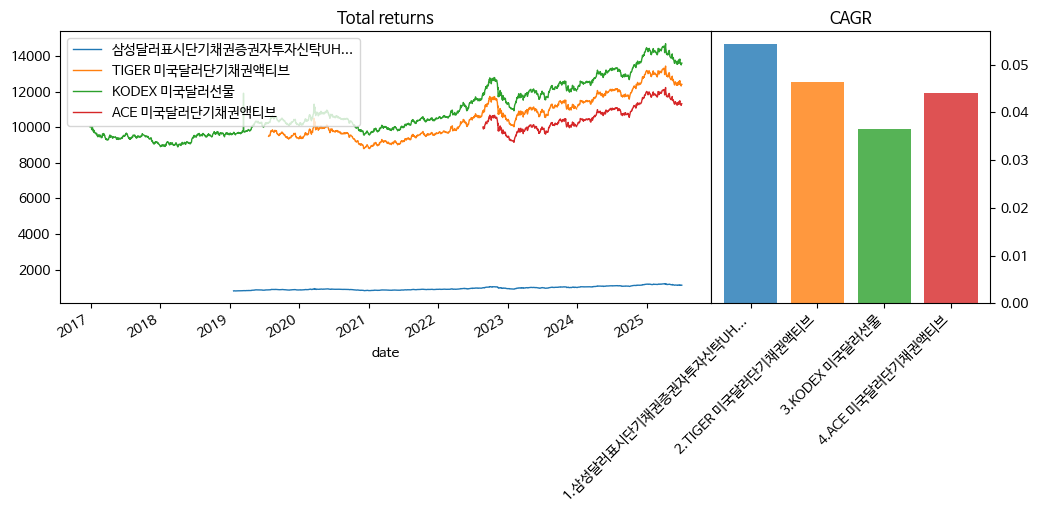

In [15]:
dm.plot(tickers, universes=univ, base=-1)

# Transaction

## MMT

In [66]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded


In [5]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

In [68]:
pf_mmt.view_record(-1, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-07-22 000150           두산  0.972500      2600000  2600000   0.189   
           003230         삼양식품  0.995290      3185000  3185000   0.227   
           010120  LS ELECTRIC  0.986486      2664000  2664000   0.181   
           042700        한미반도체  0.975839      2980000  2980000   0.205   
           267260     HD현대일렉트릭  0.936306      2826000  2826000   0.198   
...                        ...       ...          ...      ...     ...   
2025-06-16 003230         삼양식품  1.001566     -3831000        0   0.000   
           012450    한화에어로스페이스  1.000000       -60256  3880000   0.200   
           042660         한화오션  1.002350     -3574200        0   0.000   
           064350         현대로템  1.002018     -1982000  3964000   0.200   
           329180      HD현대중공업  1.002232       448000  4032000   0.200   

                   weight*      date*  
date       ticker                      
2024-07-22 000150    0.182 2024-07-22  
           003230    0.223 2024-07-22  
           010120    0.187 2024-07-22  
           042700    0.209 2024-07-22  
           267260    0.198 2024-07-22  
...                    ...        ...  
2025-06-16 003230    0.000 2025-06-17  
           012450    0.199 2025-06-17  
           042660    0.000 2025-06-17  
           064350    0.203 2025-06-17  
           329180    0.207 2025-06-17  

[83 rows x 7 columns]

*daily transactions for book keeping*

In [7]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

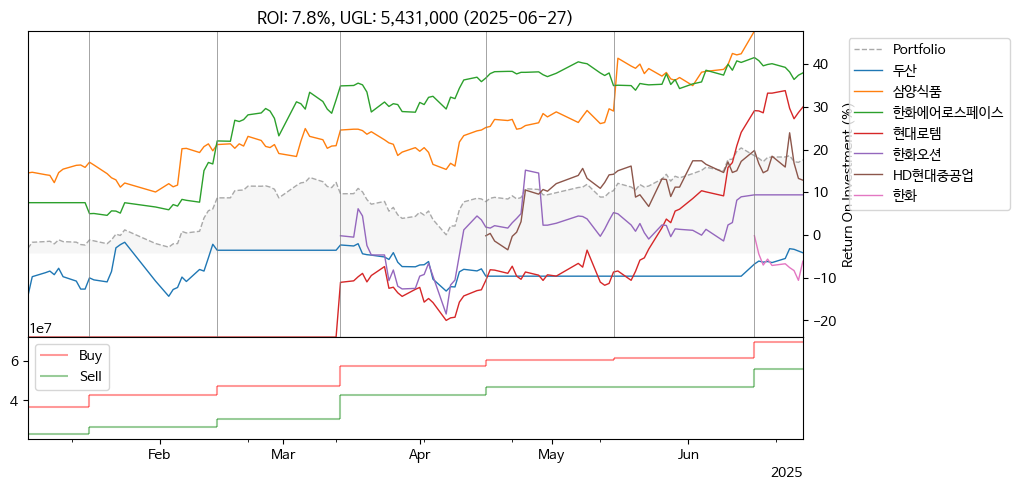

In [21]:
pf_mmt.plot(total=False, start_date='2025-01-01')

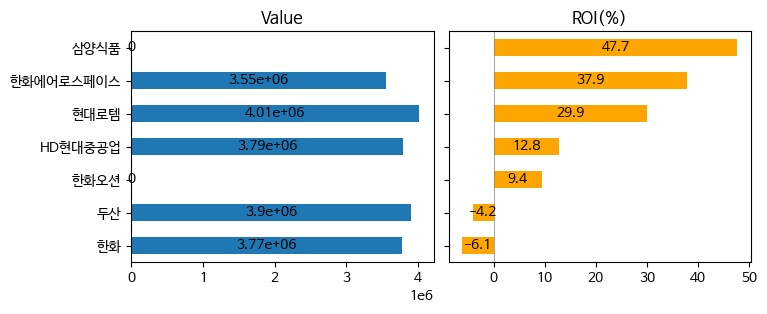

In [22]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

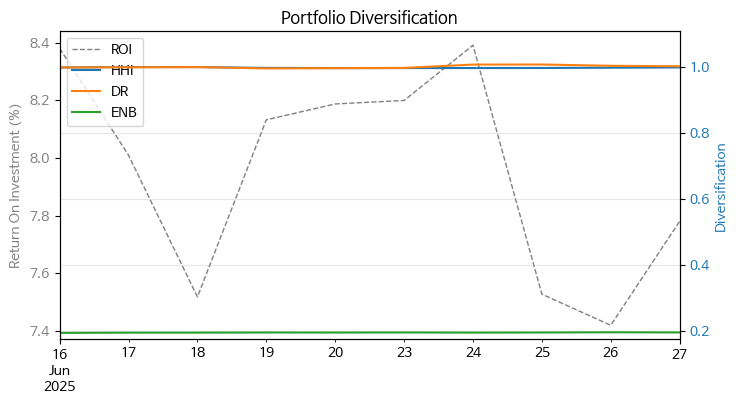

In [23]:
pf_mmt.diversification_history()

In [9]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-06-20, 69808056, 56214884, 19308770, 5715598, 0.0819


start    2024-07-22
end      2025-06-20
buy      69,808,056
sell     56,214,884
value    19,308,770
ugl       5,715,598
roi          0.0819
dtype: object

In [43]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [44]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [45]:
date_actual = '2025-07-17'
capital = WidgetTransaction.values(1)
#capital = -0.02
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-06-20 to 2025-06-20
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 3 %
Residual cash: 512,797
ROI: 7.4%, UGL: 5,424,316 (2025-06-27)
Set save=True to save transaction record


In [46]:
pf_mmt.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-06-27 000150         두산  651000           -6    0     0.0    0.000   
           000880         한화   94400            0   40     0.2    0.204   
           012450  한화에어로스페이스  890000            0    4     0.2    0.192   
           064350       현대로템  201000           -2   18     0.2    0.195   
           272210      한화시스템   59300           64   64     0.2    0.205   
           329180    HD현대중공업  422000            0    9     0.2    0.205   

                       date*  
date       ticker             
2025-06-27 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           064350 2025-07-17  
           272210 2025-07-17  
           329180 2025-07-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [18]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 loaded


In [19]:
pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
#pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [15]:
# run after editting record file
#pf_per.update_record()

In [20]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.035   
           003030   세아제강지주  193300           -4    2    0.05    0.028   
           009970  영원무역홀딩스   85700           -6    5    0.05    0.031   
           016380     KG스틸    1012         -508  495    0.05    0.036   
           047040     대우건설    3635         -127  140    0.05    0.037   
           088350     한화생명    2865          180  180    0.05    0.037   
           078930       GS   41600           12   12    0.05    0.036   
           111770     영원무역   40150           12   12    0.05    0.035   
           139130  DGB금융지주    8250           63   63    0.05    0.038   
           005830   DB손해보험  106900            4    4    0.05    0.031   
           001450     현대해상   29750           17   17    0.05    0.037   
           009900     명신산업     991          500  500    0.05    0.036   
           241560     두산밥캣   40000           13   13    0.05    0.038   
           000270       기아   93600            5    5    0.05    0.034   
           024110     기업은행   14570           35   35    0.05    0.037   
           005850      에스엘   31350           16   16    0.05    0.036   
           316140   우리금융지주   16080           32   32    0.05    0.037   
           138930  BNK금융지주    9430           55   55    0.05    0.037   
           005380      현대차  209500            2    2    0.05    0.030   
           017800   현대엘리베이   46400          100  100     NaN    0.335   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [49]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-06-27, 16472520, 2617050, 19261659, 5406189, 0.328


start    2024-10-17
end      2025-06-27
buy      16,472,520
sell      2,617,050
value    19,261,659
ugl       5,406,189
roi           0.328
dtype: object

In [50]:
#pf_per.update_record()
#pf_per.view_record(-2)

security_names updated
Data of tickers 009900, 016380 downloaded


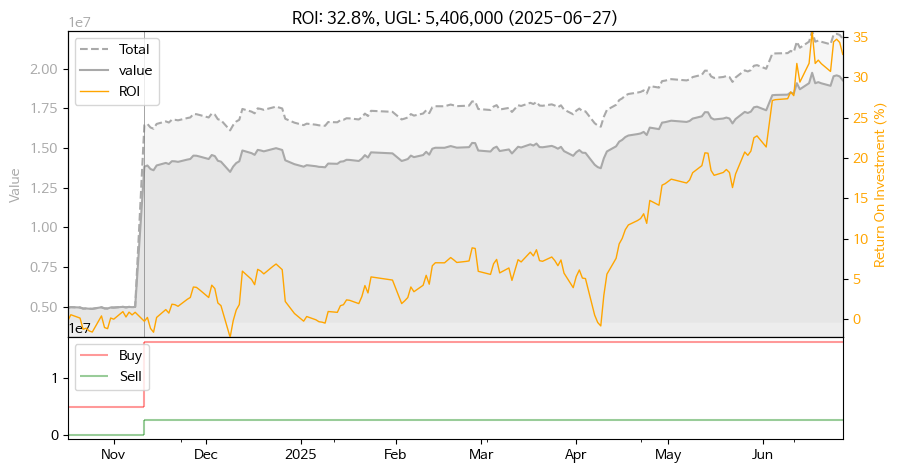

In [21]:
pf_per.plot()

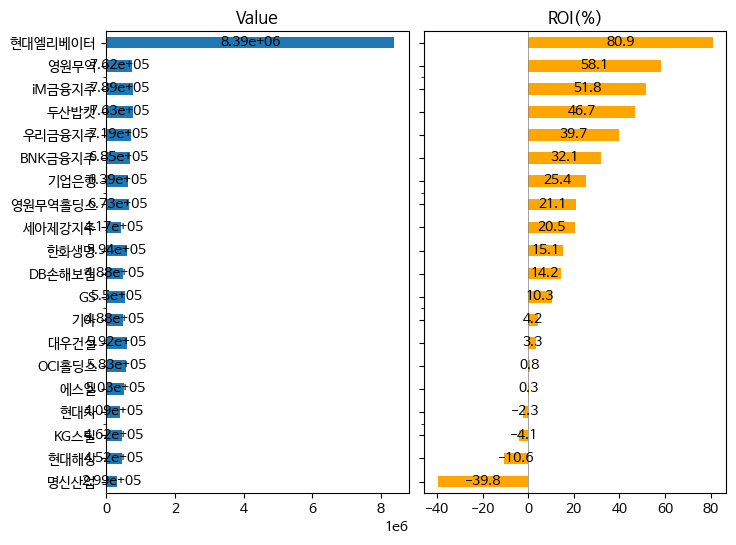

In [52]:
_ = pf_per.plot_assets(figsize=(8,6))

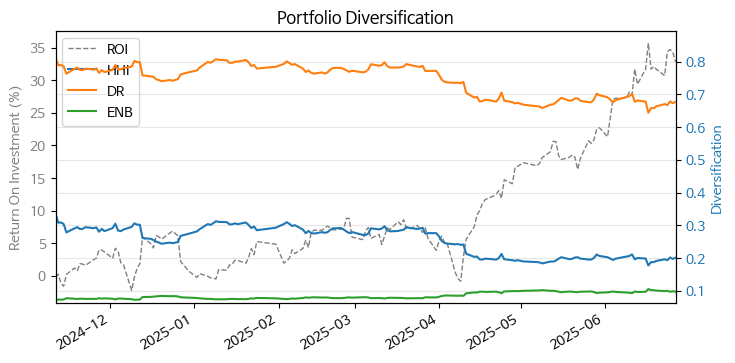

In [53]:
pf_per.diversification_history()

In [54]:
#_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [55]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

In [27]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-04-28 to 2025-06-27
Weights of tickers determined by Equal weights.
Rebalancing with contribution 3,000,000
Mean absolute error of weights: 2 %
Tickers 009900, 016380 added to universe
Deployed capital: 2,141,195
ROI: 16.3%, UGL: 5,612,785 (2025-06-27)
Set save=True to save transaction record


In [28]:
pf_per.view_record(-1, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-06-27 000270          기아    97700            6   11    0.05    0.050   
           000720        현대건설    78800           14   14    0.05    0.051   
           001450        현대해상    26650           24   41    0.05    0.050   
           003030      세아제강지주   209000           -2    0    0.00    0.000   
           003240        태광산업  1103000            1    1    0.05    0.051   
           004020        현대제철    30200           36   36    0.05    0.050   
           005380         현대차   205000            3    5    0.05    0.047   
           005830      DB손해보험   122300            5    9    0.05    0.051   
           005850         에스엘    31500           19   35    0.05    0.051   
           007340     DN오토모티브    22150           50   50    0.05    0.051   
           008770        호텔신라    51500           21   21    0.05    0.050   
           009900        명신산업     1000         -500    0    0.00    0.000   
           009970     영원무역홀딩스   134800            3    8    0.05    0.050   
           010060      OCI홀딩스    73000           -8    0    0.00    0.000   
           010950       S-Oil    58200           19   19    0.05    0.051   
           016380        KG스틸     1014         -495    0    0.00    0.000   
           017800     현대엘리베이터    84100         -100    0    0.00    0.000   
           018880       한온시스템     3125          356  356    0.05    0.051   
           023530        롯데쇼핑    74500           14   14    0.05    0.048   
           024110        기업은행    18300          -35    0    0.00    0.000   
           036460      한국가스공사    39850           27   27    0.05    0.050   
           047040        대우건설     4240         -140    0    0.00    0.000   
           051910        LG화학   209000            5    5    0.05    0.048   
           078930          GS    45950          -12    0    0.00    0.000   
           088350        한화생명     3305          157  337    0.05    0.051   
           096770     SK이노베이션    97800           11   11    0.05    0.050   
           111770        영원무역    63600          -12    0    0.00    0.000   
           138930     BNK금융지주    12480          -55    0    0.00    0.000   
           139130      iM금융지주    12550          -63    0    0.00    0.000   
           241560        두산밥캣    58800          -13    0    0.00    0.000   
           316140      우리금융지주    22500          -32    0    0.00    0.000   
           361610  SK아이이테크놀로지    26650           41   41    0.05    0.050   
           402340       SK스퀘어   176300            6    6    0.05    0.049   

                       date*  
date       ticker             
2025-06-27 000270 2025-11-12  
           000720 2025-11-12  
           001450 2025-11-12  
           003030 2025-11-12  
           003240 2025-11-12  
           004020 2025-11-12  
           005380 2025-11-12  
           005830 2025-11-12  
           005850 2025-11-12  
           007340 2025-11-12  
           008770 2025-11-12  
           009900 2025-11-12  
           009970 2025-11-12  
           010060 2025-11-12  
           010950 2025-11-12  
           016380 2025-11-12  
           017800 2025-11-12  
           018880 2025-11-12  
           023530 2025-11-12  
           024110 2025-11-12  
           036460 2025-11-12  
           047040 2025-11-12  
           051910 2025-11-12  
           078930 2025-11-12  
           088350 2025-11-12  
           096770 2025-11-12  
           111770 2025-11-12  
           138930 2025-11-12  
           139130 2025-11-12  
           241560 2025-11-12  
           316140 2025-11-12  
           361610 2025-11-12  
           402340 2025-11-12

*New asset turnover*

In [29]:
pf_per.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-10-17,5.0,5.0,1.00
2024-11-11,15.0,20.0,0.75
2025-06-27,13.0,20.0,0.65


*Compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*Performance without old assets*

In [53]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

security_names updated
Data of tickers 001740, 178920 downloaded
Trading of assets 015760 to halt
Updated with transaction on 2025-06-24
Set save=True to save transaction record
ROI: 20.1%, UGL: 3,144,328 (2025-06-24)


start    2025-05-09
end      2025-06-24
buy      15,657,406
sell            0.0
value    18,801,734
ugl       3,144,328
roi           0.201
dtype: object

## WTR
*modified all weather*

In [31]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-06-02'

In [32]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-06-27 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_wtr_static_250213.csv loaded


In [45]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [33]:
pf_wtr.view_record(-2, nshares=False)

name     ratio  transaction      net  \
date       ticker                                                         
2024-11-20 069500             KODEX 200  1.000000       231070  1617490   
           148070          KOSEF 국고채10년  0.999744      -117035  1521455   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1607410   
           284430        KODEX 200미국채혼합  0.999603        62925  1623464   
           379800      KODEX 미국S&P500TR  1.001064      -150320  1615940   
           411060            ACE KRX금현물  1.004401      -170400  1635840   
2025-02-13 069500             KODEX 200  0.991447        52641  1758990   
           148070         KIWOOM 국고채10년  0.997349       177132  1725450   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1639750   
           284430        KODEX 200미국채혼합  0.995416        65450  1754060   
           379800        KODEX 미국S&P500  0.992332        20215  1758705   
           411060            ACE KRX금현물  0.959900      -505365  1804875   

                   weight  weight*      date*  
date       ticker                              
2024-11-20 069500  0.1670    0.168 2024-11-20  
           148070  0.1670    0.158 2024-11-20  
           273130  0.1670    0.167 2024-11-20  
           284430  0.1670    0.169 2024-11-20  
           379800  0.1670    0.168 2024-11-20  
           411060  0.1670    0.170 2024-11-20  
2025-02-13 069500  0.1667    0.168 2025-02-14  
           148070  0.1667    0.165 2025-02-14  
           273130  0.1667    0.157 2025-02-14  
           284430  0.1667    0.168 2025-02-14  
           379800  0.1667    0.168 2025-02-14  
           411060  0.1667    0.173 2025-02-14

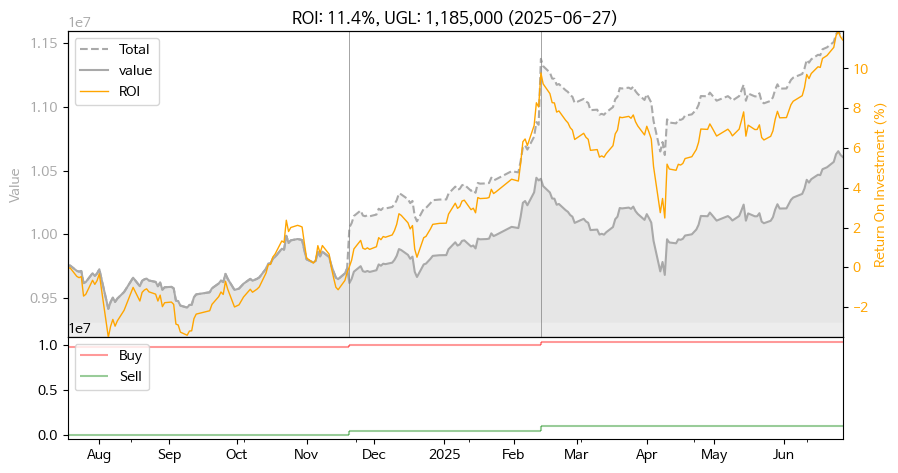

In [34]:
pf_wtr.plot(total=True)

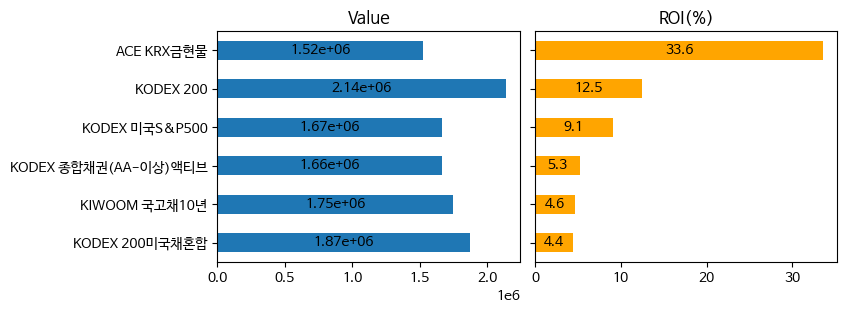

In [35]:
_ = pf_wtr.plot_assets(figsize=(8,3))

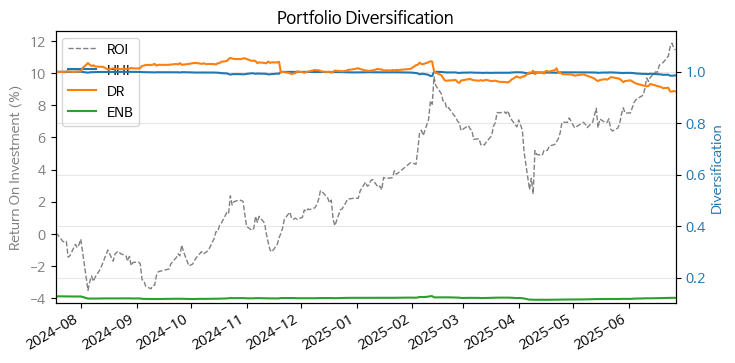

In [36]:
pf_wtr.diversification_history()

In [42]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-12-18, 2025-06-02, 10516562, 0.0, 10816341, 299779, 0.0285


start    2024-12-18
end      2025-06-02
buy      10,516,562
sell            0.0
value    10,816,341
ugl         299,779
roi          0.0285
dtype: object

In [36]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [37]:
#pf_wtr.performance_stats(metrics=METRICS)

In [37]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [42]:
capital = WidgetTransaction.values(1)
#capital = 0.8
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

6 tickers selected by Selected from 2025-06-27 to 2025-06-27
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 2 %
Residual cash: 176,962
ROI: 11.1%, UGL: 1,184,738 (2025-06-27)
Set save=True to save transaction record


In [43]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34061            2   52  0.1667   
           148070         KIWOOM 국고채10년  115030            2   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20154            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-06-27 069500             KODEX 200   41435          -10   42  0.1667   
           148070         KIWOOM 국고채10년  116635            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  118790            0   14  0.1667   
           284430        KODEX 200미국채혼합   13955           -8  126  0.1667   
           379800        KODEX 미국S&P500   19120            5   92  0.1667   
           411060            ACE KRX금현물   20310           12   87  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-06-27 069500    0.167 2025-08-14  
           148070    0.168 2025-08-14  
           273130    0.159 2025-08-14  
           284430    0.168 2025-08-14  
           379800    0.169 2025-08-14  
           411060    0.169 2025-08-14

In [44]:
pf_wtr.performance_stats()

,Realized,Simulated
start,2024-07-19,2022-01-03
end,2025-06-27,2025-06-27
total_return,0.110916,0.308592
cagr,0.118522,0.080355
calmar,1.784524,0.743865
max_drawdown,-0.066417,-0.108023
avg_drawdown,-0.013004,-0.014669
avg_drawdown_days,21.785714,40.068966
monthly_vol,0.051187,0.073693
monthly_sharpe,2.415428,1.278081


In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [6]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='WTR',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_srt_static_250602.csv loaded


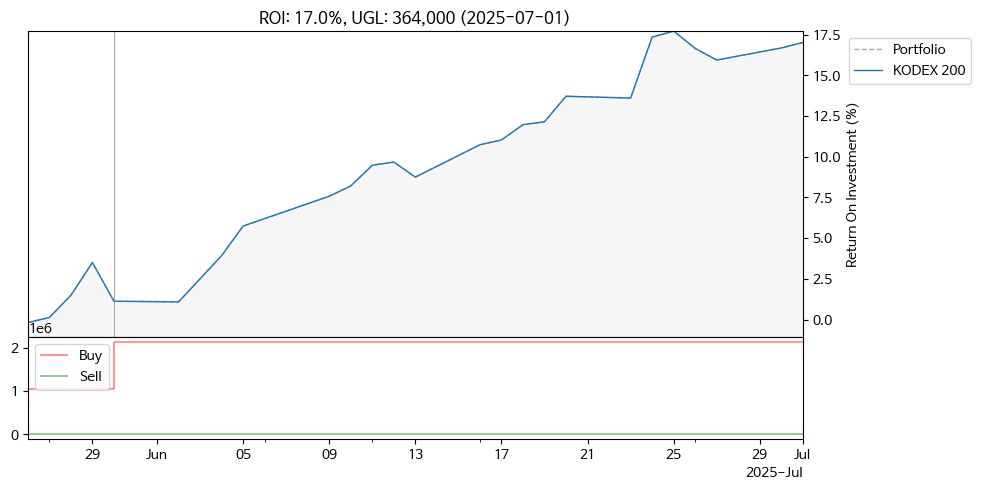

In [7]:
pf_srt.plot(total=False)

In [6]:
pf_srt.valuate()

start    2025-05-26
end      2025-06-09
buy       2,138,730
sell            0.0
value     2,300,747
ugl         162,017
roi          0.0758
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
date_actual = '2025-06-02'
kw = dict(
    buy = {'069500': 1082460}, 
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual = date_actual,
)
_ = pf_srt.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-02
All transactions saved to pf_srt_static_250602.csv
ROI: 1.1%, UGL: 24,074 (2025-06-02)


In [21]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-26,069500,KODEX 200,35190,30,30,1.0,1.0,2025-05-27
2025-05-30,069500,KODEX 200,36140,30,60,1.0,1.0,2025-06-02


## SDS

In [8]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='WTR',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_sds_static_250609.csv loaded


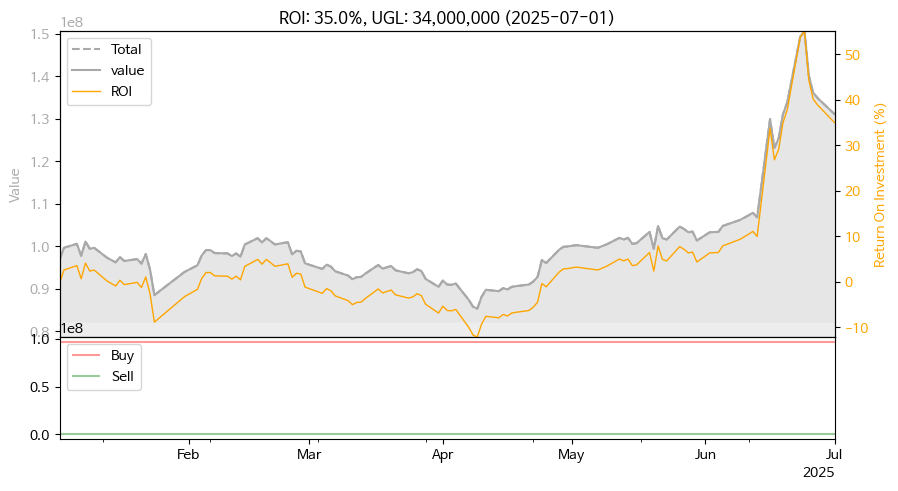

In [9]:
pf_sds.plot()

In [47]:
pf_sds.performance_stats()

,Realized,Simulated
start,2025-01-03,2022-01-03
end,2025-06-27,2025-06-27
total_return,0.353906,0.107348
cagr,0.882107,0.029736
calmar,5.421021,0.081966
max_drawdown,-0.16272,-0.362791
avg_drawdown,-0.052772,-0.130795
avg_drawdown_days,13.545455,209.333333
monthly_vol,0.520484,0.293094
monthly_sharpe,1.90898,0.342901


In [24]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [36]:
#capital = {'018260': 97110000} # = 780 * price on 2025-01-02
capital = {'018260': -20000000} # test sell

kw = dict(
    capital = capital,
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-11 to 2025-06-11
Weights of tickers determined by Specified.
Rebalancing with residual 20,000,000
Mean absolute error of weights: 0 %
Residual cash: 20,118,800
ROI: 0.8%, UGL: 895,309 (2025-06-11)
Set save=True to save transaction record


In [37]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-09,018260,삼성에스디에스,136400,780,780,1.0,1.0,2025-01-01
2025-06-11,018260,삼성에스디에스,137800,-146,634,1.0,1.0,2025-06-11


## FXM

In [10]:
kw = dict(
    file='pf_fxm_static', path=path_tran,
    universe='UV_ETF', strategy='WTR',
    **kw_cost
)
pf_fxm = PM.create_portfolio('FXM', **kw)

2 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [11]:
#pf_fxm.update_record()

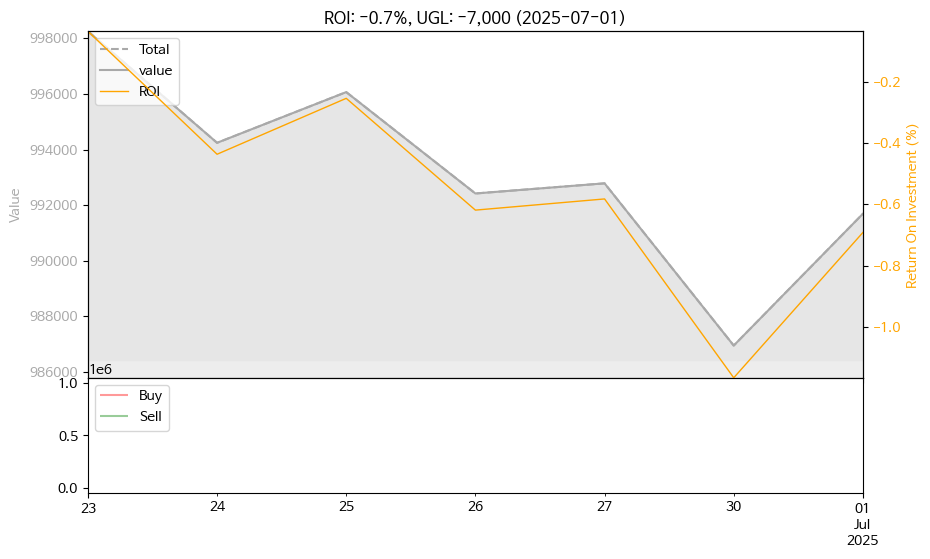

In [12]:
pf_fxm.plot()

In [41]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [70]:
#capital = WidgetTransaction.values(1)
capital = {'261240': 1e6}

kw = dict(
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    nshares = True
)
_ = pf_fxm.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-24 to 2025-06-24
Weights of tickers determined by Specified.
Rebalancing with contribution 1,000,000.0
Mean absolute error of weights: 0 %
Deployed capital: 994,625
ROI: -0.2%, UGL: -4,696 (2025-06-24)
Set save=True to save transaction record


In [71]:
pf_fxm.view_record(nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-23,261240,KODEX 미국달러선물,13680,73,73,1.0,1.0,2025-06-24
2025-06-24,261240,KODEX 미국달러선물,13625,73,146,1.0,1.0,2025-06-24


## LIQ

In [28]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-26 uploaded.
Price data loaded
Cost data transaction_cost_250514.csv loaded
Transaction record pf_liq_static_250526.csv loaded


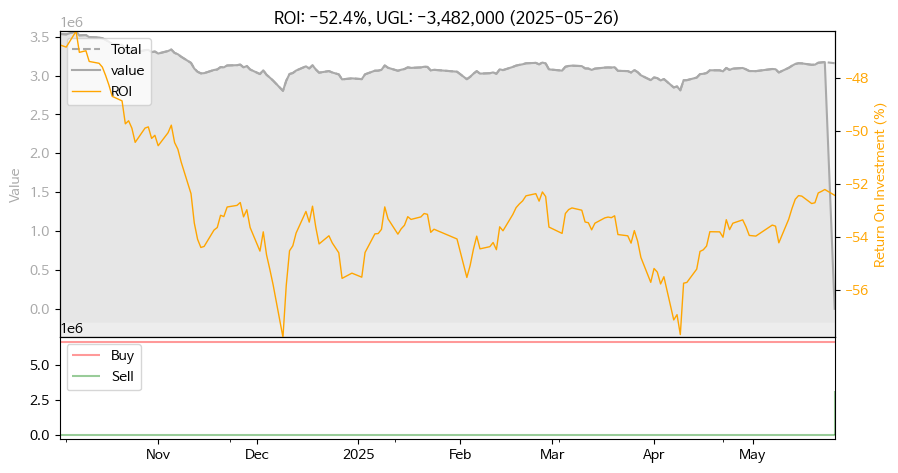

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

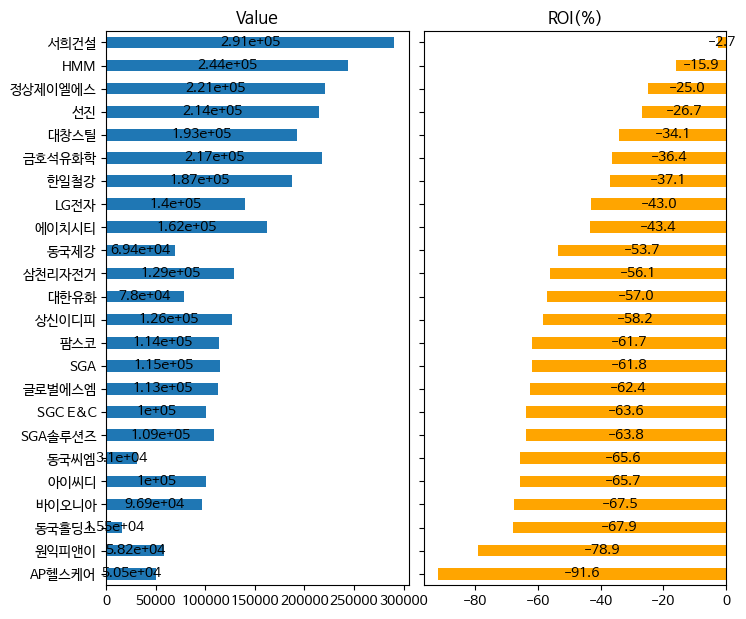

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [33]:
kw_st = dict(
    #security_names = fund_names # need for new assets to buy
)

In [34]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

33 securities from 2023-03-29 to 2025-07-01 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_tdf_static_250421.csv loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [105]:
#pf_tdf.check_universe()

In [106]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

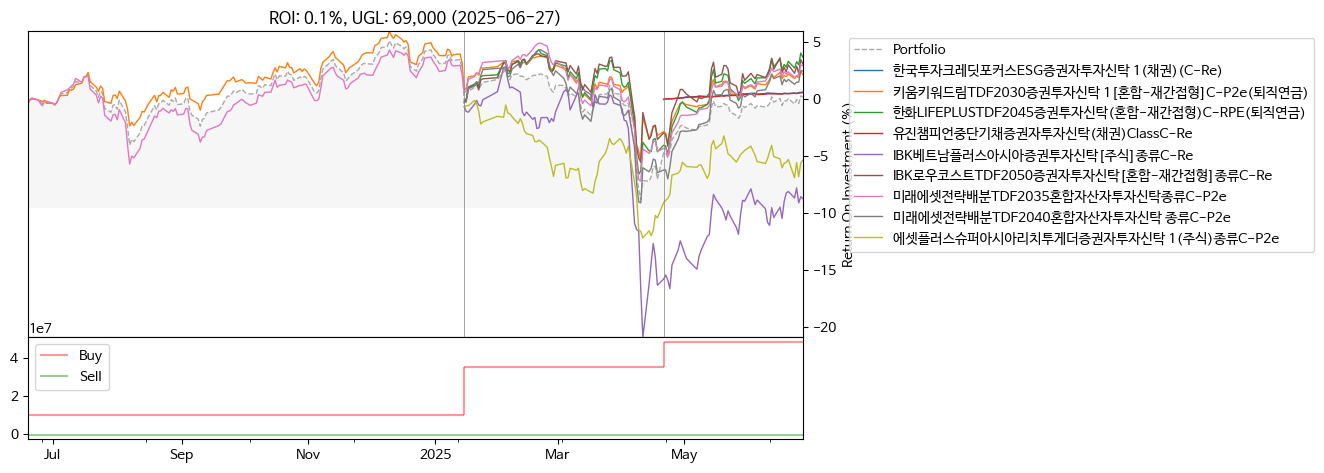

In [53]:
#start = '2025-01-01'
start = None
pf_tdf.plot(start, total=False, roi=True)

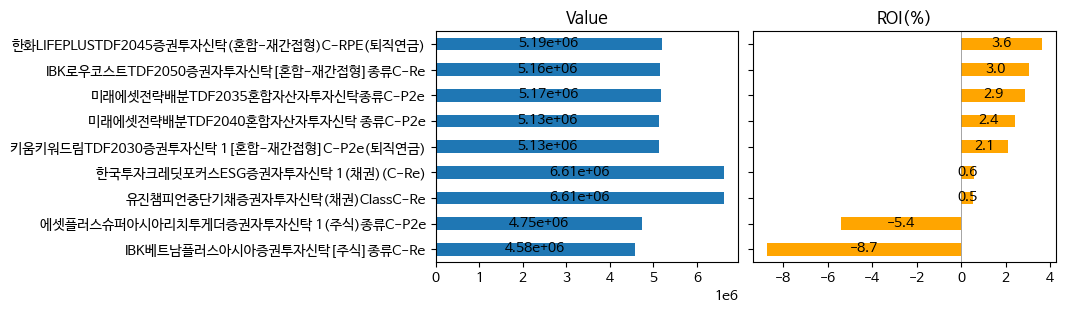

In [54]:
_ = pf_tdf.plot_assets(figsize=(8,3))

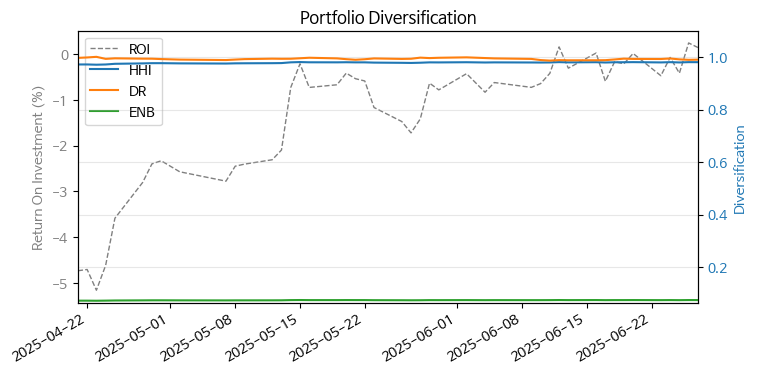

In [42]:
pf_tdf.diversification_history()

In [19]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-06-20, 48148612, -102859, 48255021, 3550, 7.37e-05


start    2024-06-19
end      2025-06-20
buy      48,148,612
sell       -102,859
value    48,255,021
ugl           3,550
roi        0.000074
dtype: object

In [35]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [39]:
tkrs = ['K55105CH3411', 'K55223BU8809', 'K55301BX0493', 'K55235CI9634', 'K55105BU7648', 'K55301BU6139', 'K55213C50702', 'K55234DF3150']
#cash = [5e6, 5e6, 5e6, 5e6, 0, 0, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 5e6, 0, 5e6, 5e6, 5e6] # 0.114441, 0.715891 for cagr & y/sharpe
cash = [0, 5e6, 5e6, 0, 5e6, 5e6, 5e6, 5e6] # 0.105829, 0.736896
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

_ = [print(f'{k} {fund_names[k]}: {v:,.0f}') for k,v in zip(tkrs, cash)]
sum(buy.values())

K55105CH3411 삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금): 0
K55223BU8809 KB유로인덱스40증권자투자신탁(채권혼합-파생형)C-퇴직e: 5,000,000
K55301BX0493 미래에셋차이나그로스증권자투자신탁 1(주식)종류C-P2e: 5,000,000
K55235CI9634 피델리티인디아증권자투자신탁(주식-재간접형)종류C-e: 0
K55105BU7648 삼성퇴직연금인디아40증권자투자신탁 1[채권혼합]Ce: 5,000,000
K55301BU6139 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e: 5,000,000
K55213C50702 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금): 5,000,000
K55234DF3150 IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re: 5,000,000


30000000.0

In [72]:
# new buy
date_actual='2024-06-23'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    #buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
    buy = buy
)
_ = pf_tdf.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-27
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.0%, UGL: 13,207 (2025-06-27)


In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
#_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [73]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-06-27 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105BU7648                 삼성퇴직연금인디아40증권자투자신탁 1[채권혼합]Ce      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55223BU8809              KB유로인덱스40증권자투자신탁(채권혼합-파생형)C-퇴직e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55301BX0493               미래에셋차이나그로스증권자투자신탁 1(주식)종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-27 K55101BV9571            0   6616957     NaN    0.084 2024-06-23  
           K55105BU7648      5000000   5000000     NaN    0.064 2024-06-23  
           K55206C95800            0   5155392  0.1429    0.066 2024-06-23  
           K55213C50702      5000000  10208198  0.1429    0.130 2024-06-23  
           K55214CD4825            0   6612919     NaN    0.084 2024-06-23  
           K55223BU8809      5000000   5000000     NaN    0.064 2024-06-23  
           K55234BY9966            0   4612762  0.1429    0.059 2024-06-23  
           K55234DF3150      5000000  10167031  0.1429    0.130 2024-06-23  
           K55301BU6139      5000000  10207667  0.1429    0.130 2024-06-23  
           K55301BU6253            0   5145548  0.1429    0.066 2024-06-23  
           K55301BX0493      5000000   5000000     NaN    0.064 2024-06-23  
           K55364CF7048            0   4780274  0.1429    0.061 2024-06-23

In [74]:
pf_tdf.performance_stats(-2)

,Realized,Simulated (250421),Simulated (250627)
start,2024-06-20,2023-03-29,2023-03-29
end,2025-06-27,2025-04-21,2025-06-27
total_return,0.001,0.191346,0.253721
cagr,0.000982,0.088514,0.105829
calmar,0.007403,1.076316,1.324978
max_drawdown,-0.132644,-0.082238,-0.079873
avg_drawdown,-0.034468,-0.008015,-0.008793
avg_drawdown_days,48.285714,12.040816,14.586957
monthly_vol,0.048443,0.063455,0.051173
monthly_sharpe,0.090621,1.317435,1.939815


## HANA

In [14]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [15]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

32 securities from 2023-03-29 to 2025-06-27 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [9]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

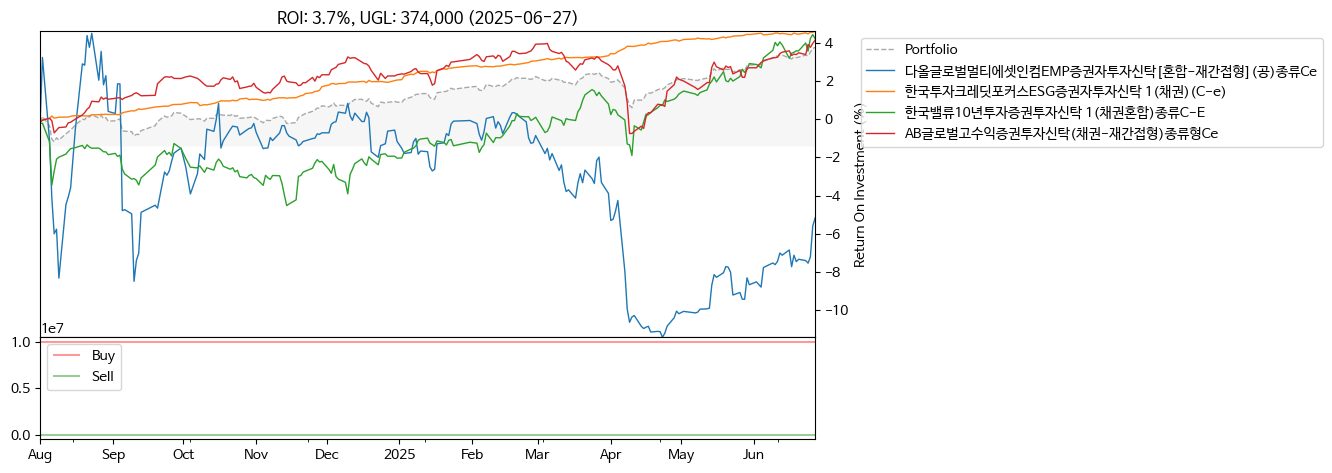

In [10]:
pf_hana.plot(total=False, roi=True)

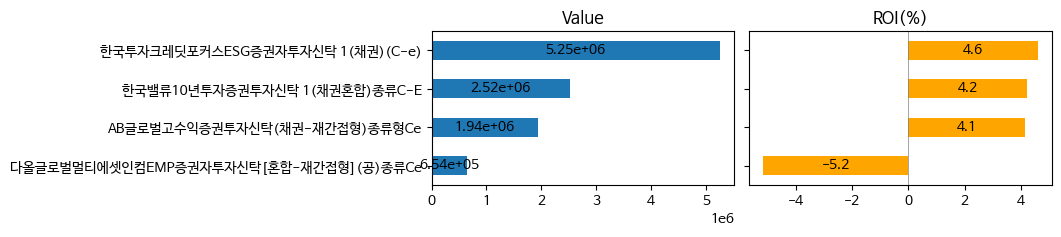

In [11]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

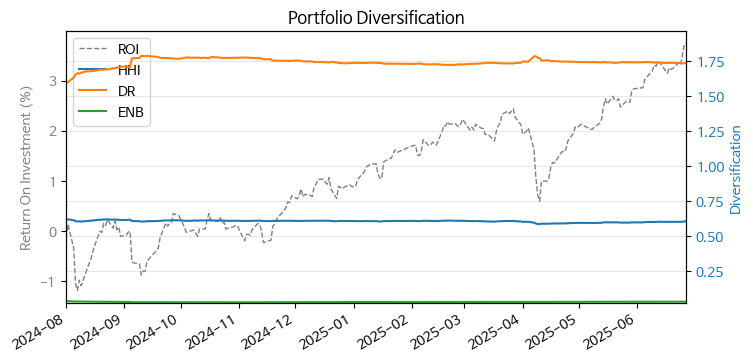

In [12]:
pf_hana.diversification_history()

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)

In [17]:
pf_hana.view_record()

name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [16]:
pf_hana.performance_stats()

,Realized,Simulated
start,2024-08-02,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.03603,0.163141
cagr,0.040079,0.069544
calmar,2.233076,3.890154
max_drawdown,-0.017948,-0.017877
avg_drawdown,-0.003405,-0.00237
avg_drawdown_days,10.869565,9.833333
monthly_vol,0.013836,0.024964
monthly_sharpe,3.29426,2.671603


## SAVE
연금저축

In [94]:
pf = 'SAVE_2503'

In [95]:
kw_st = dict(
    #security_names = fund_names
)

In [96]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

33 securities from 2023-03-29 to 2025-06-27 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_save_static_250421.csv loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
2025-04-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
2025-04-21 K55101D20874            0  1615880    0.25    0.154 2024-04-17  
           K55107BU0252      2000000  2000000     NaN    0.190 2025-04-21  
           K55206C11278            0  1976152    0.25    0.188 2024-04-17  
           K55214B30803      1584916  1584916     NaN    0.151 2025-04-21  
           K55307DH1659            0  1672578    0.25    0.159 2024-04-17  
           KR5235AK9808            0  1671996    0.25    0.159 2024-04-17

In [10]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

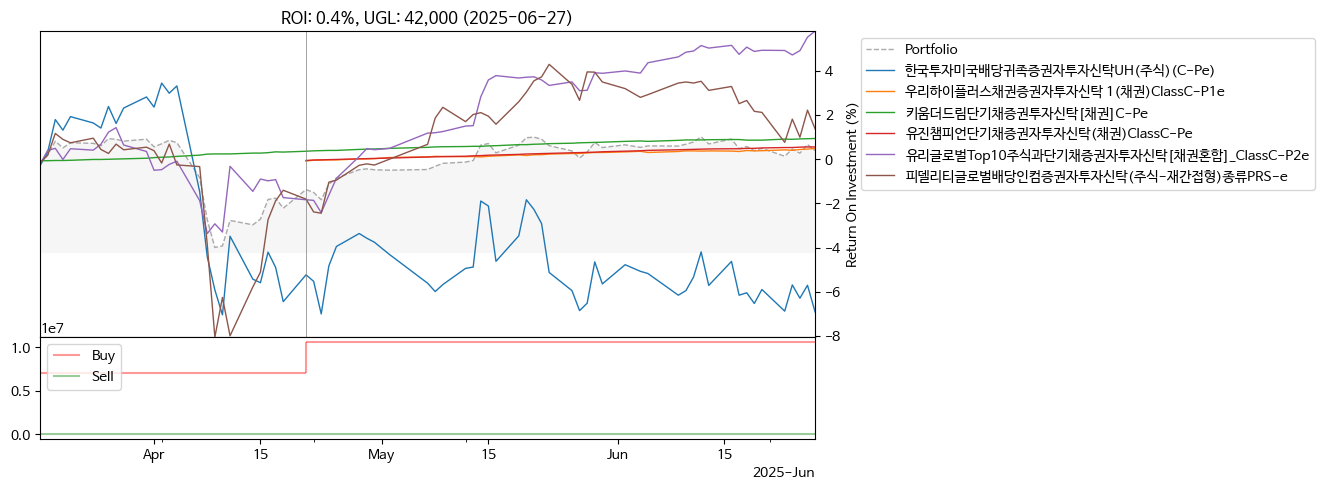

In [11]:
pf_save.plot(total=False, roi=True)

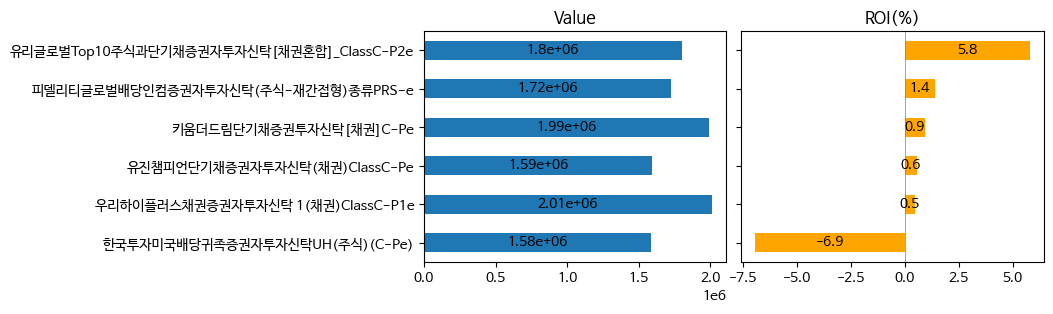

In [97]:
_ = pf_save.plot_assets(figsize=(8,3))

In [90]:
date = None
#pf_save.valuate(date, print_msg=True, join_str=True)
pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
K55307DH1659,유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e,2025-03-17,2025-06-27,5700000.0,-3.093531e+03,5799848,96754.469135,0.016974
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,2025-03-17,2025-06-27,1700000.0,-2.184424e+03,1724210,22025.575616,0.012956
K55206C11278,키움더드림단기채증권투자신탁[채권]C-Pe,2025-03-17,2025-06-27,1967714.0,1.987423e+06,-1827,17881.833674,0.009088
K55107BU0252,우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e,2025-04-21,2025-06-27,2000000.0,2.010237e+06,-1655,8582.148912,0.004291
K55214B30803,유진챔피언단기채증권자투자신탁(채권)ClassC-Pe,2025-04-21,2025-06-27,1584916.0,-6.122994e+02,1593794,8265.700614,0.005215
K55236BG3001,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-Pe,2025-06-27,2025-06-27,6000000.0,0.000000e+00,6000000,0.000000,0.000000
K55101D20874,한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe),2025-03-17,2025-06-27,1700000.0,-3.839076e+03,1583653,-120186.075503,-0.070698


In [15]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [134]:
date_actual='2024-06-30'

# 유리글로벌Top10, 피델리티글로벌배당인컴, 다올중국1등주, 한국밸류10년, 피델리티유럽
tkrs = ['K55307DH1659', 'KR5235AK9808', 'K55306BT9453', 'K55236BG3274', 'KR5235AK9691']
cash = [2e6, 2e6, 2e6, 1e7, 2e6] # y/sharpe 1.38, cagr 0.12
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}
sell = ['K55206C11278'] #, 'K55107BU0252'] #['K55101D20874']

kw = dict(
    #buy = {'K55107BU0252':2000000, 'K55214B30803':1584916},
    #buy = {'K55307DH1659':2e6, 'KR5235AK9808':2e6, 'K55363DD7958':4e6},
    #buy = buy,
    sell = sell,
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-27
Ticker names of None updated
Set save=True to save transaction record
ROI: 0.1%, UGL: 33,396 (2025-06-27)


In [13]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    date_actual = date_actual
)
#_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [135]:
pf_save.view_record(-1)

name  ratio  \
date       ticker                                                          
2025-06-27 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55306BT9453                  다올중국1등주증권자투자신탁[주식]종류C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9691               피델리티유럽증권자투자신탁(주식-재간접형)PRS-e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-27 K55101D20874            0   1590655    0.25    0.060 2024-06-30  
           K55107BU0252            0   2011455     NaN    0.075 2024-06-30  
           K55206C11278     -1988445         0    0.25    0.000 2024-06-30  
           K55214B30803            0   1594626     NaN    0.060 2024-06-30  
           K55236BG3274     10000000  10000000     NaN    0.374 2024-06-30  
           K55306BT9453      2000000   2000000     NaN    0.075 2024-06-30  
           K55307DH1659      2000000   3805456    0.25    0.142 2024-06-30  
           KR5235AK9691      2000000   2000000     NaN    0.075 2024-06-30  
           KR5235AK9808      2000000   3728273    0.25    0.139 2024-06-30

In [136]:
pf_save.performance_stats(-2)

,Realized,Simulated (250421),Simulated (250627)
start,2025-03-18,2023-03-29,2023-03-29
end,2025-06-27,2025-04-21,2025-06-27
total_return,-0.000939,0.162469,0.288171
cagr,-0.003392,0.075652,0.119246
calmar,-0.069371,1.974158,1.326661
max_drawdown,-0.048896,-0.038321,-0.089884
avg_drawdown,-0.02595,-0.00452,-0.012559
avg_drawdown_days,49.0,11.076923,19.527778
monthly_vol,0.042906,0.033845,0.081772
monthly_sharpe,-0.722905,2.089988,1.369388


## FISA

In [25]:
kw_st = dict(
    method_select = 'selected'    
)

In [26]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

28 securities from 2023-03-29 to 2025-06-24 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded
Transaction record pf_fisa_static_250604.csv loaded


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

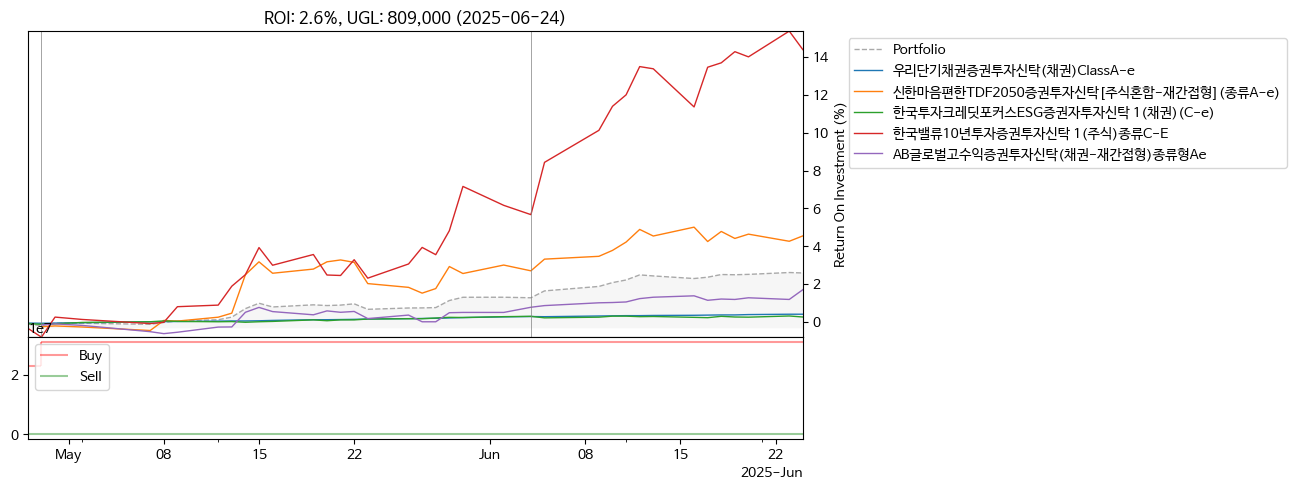

In [27]:
pf_fisa.plot(total=False, roi=True)

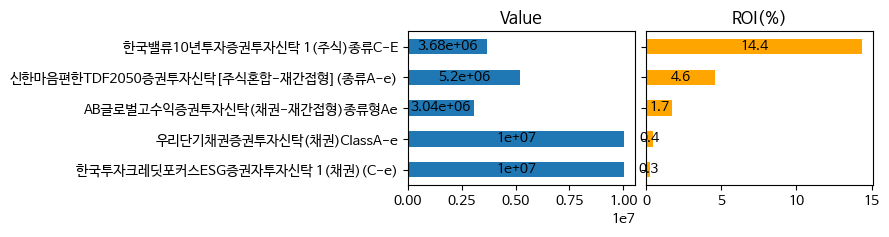

In [28]:
_ = pf_fisa.plot_assets(roi=True, figsize=(6,2))

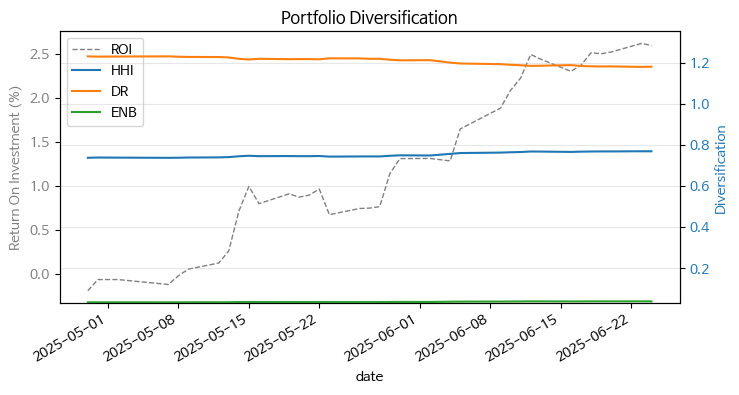

In [29]:
pf_fisa.diversification_history()

In [14]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-06-04, 30960600, -251.0, 31375223, 414372, 0.0134


start    2025-04-28
end      2025-06-04
buy      30,960,600
sell         -251.0
value    31,375,223
ugl         414,372
roi          0.0134
dtype: object

In [15]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
date_actual='2024-06-02'

# new buy
#tickers = ['K55210CO3737','KR5370AP9949']
#capital = [5e6, 3e6]
#capital = dict(zip(tickers, capital))

capital = {'KR5236AS4818': 215435}

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-04
All transactions saved to pf_fisa_static_250604.csv
ROI: 1.3%, UGL: 400,470 (2025-06-04)


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25  
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

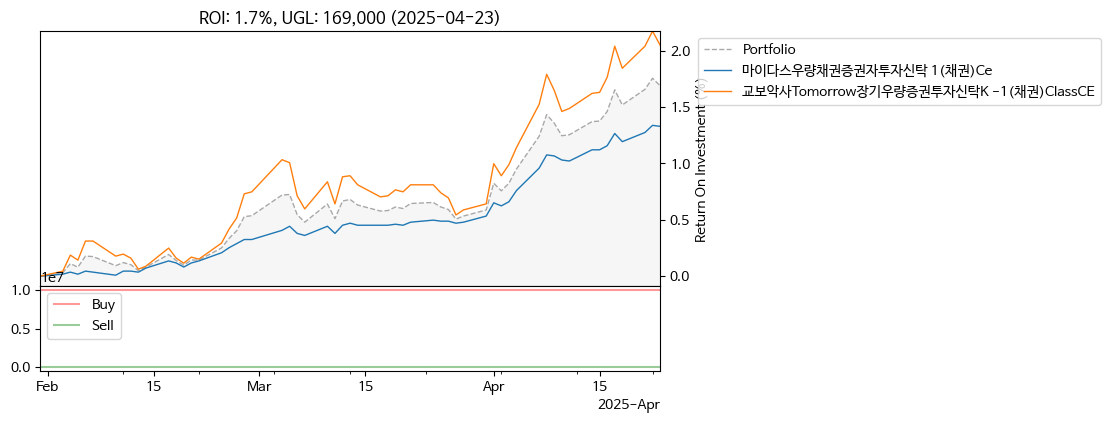

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

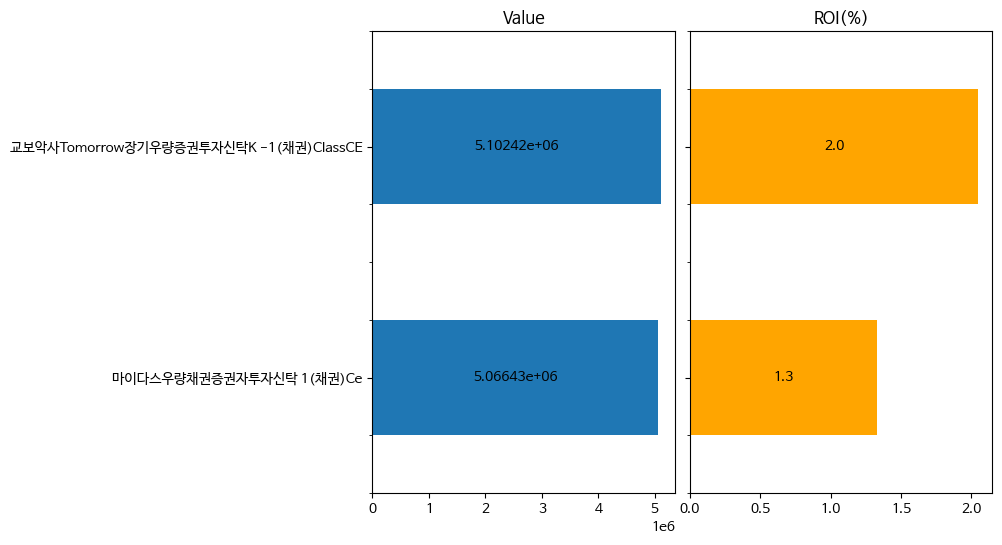

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [11]:
a = list()

a or 1
tickers

['K55101D20874', 'K55214CD4825', 'K55206C11278']

In [9]:
fund.performance(tickers=tickers, metrics='cagr')

,name,cagr
K55235B96163,피델리티인디아증권자투자신탁(주식-재간접형)종류PRS-e,0.128254
KR5370AP9949,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae,0.031944
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,0.079653


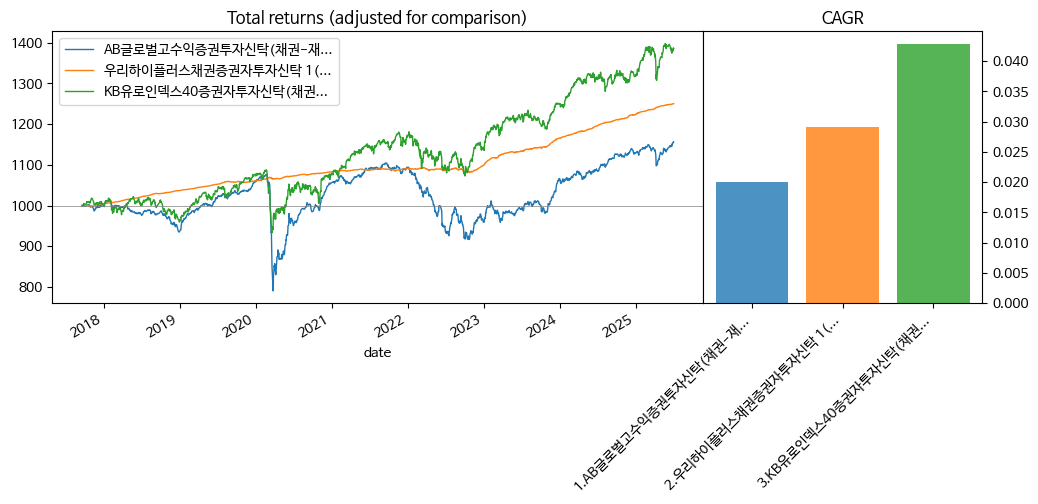

In [11]:
fund.plot(tickers)

In [9]:
k200 = PM.create_universe('UV_K200')
fund = PM.create_universe('UV_FUND')

200 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded
33 securities from 2015-01-02 to 2025-07-02 uploaded.
Master data for 324 funds loaded.
Price data loaded


In [10]:
k200.performance()

,name,start,end,rf,total_return,cagr,max_drawdown,calmar,mtd,three_month,...,yearly_skew,yearly_kurt,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc
047810,한국항공우주,2022-01-03,2025-07-01,0.0,1.729483,0.333289,-0.354839,0.939268,0.0,0.126725,...,1.52003,NaN,0.635701,-0.017682,-0.089557,59.85,0.068875,-0.052765,0.666667,0.78125
375500,DL이앤씨,2022-01-03,2025-07-01,0.0,-0.127883,-0.03844,-0.576389,-0.066691,0.032819,0.293833,...,1.369499,NaN,0.664075,-0.108183,-0.382177,631.0,0.079632,-0.088772,0.666667,0.4375
010950,S-Oil,2022-01-03,2025-07-01,0.0,-0.280559,-0.090017,-0.585185,-0.153826,0.03172,0.089947,...,1.605408,NaN,0.127737,-0.212644,-0.102747,123.8,0.071632,-0.063551,0.333333,0.125
007310,오뚜기,2022-01-03,2025-07-01,0.0,-0.115172,-0.034446,-0.304217,-0.113228,0.013959,-0.020833,...,-1.628629,NaN,0.010114,-0.159664,-0.08408,180.285714,0.036574,-0.035397,0.333333,0.34375
034020,두산에너빌리티,2022-01-03,2025-07-01,0.0,1.983294,0.367686,-0.460385,0.798648,-0.086257,1.620545,...,1.727273,NaN,2.561254,0.032468,-0.123971,111.090909,0.156834,-0.071209,1.0,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329180,HD현대중공업,2022-01-03,2025-07-01,0.0,3.308402,0.519543,-0.388925,1.335843,-0.01867,0.445017,...,1.027287,NaN,1.228682,0.112069,-0.073004,39.6,0.142399,-0.075376,1.0,0.78125
005850,에스엘,2022-01-03,2025-07-01,0.0,0.006329,0.001809,-0.42625,0.004244,0.0176,-0.162055,...,1.109557,NaN,0.555556,-0.155462,-0.136536,103.583333,0.086645,-0.083629,0.666667,0.625
008770,호텔신라,2022-01-03,2025-07-01,0.0,-0.355499,-0.118244,-0.605495,-0.195286,-0.025145,0.326316,...,1.184565,NaN,0.365854,-0.43578,-0.149243,113.909091,0.062849,-0.056159,0.333333,0.3125
352820,하이브,2022-01-03,2025-07-01,0.0,-0.105563,-0.031454,-0.687589,-0.045745,0.014563,0.334043,...,-0.866914,NaN,0.620993,-0.171734,-0.687589,1274.0,0.11775,-0.09434,0.666667,0.5625


In [6]:
fund.df_prices

,K55301BU6139,K55206C95800,K55301BU6253,K55364CF7048,K55234BY9966,KR5101888398,KR5236AS4826,KR5370AP9956,K55306CV9946,K55234DF3150,...,K55105CH3411,K55223BU8809,K55301BX0493,K55101BV9571,K55214CD4825,K55107BB0404,K55210CO3737,KR5370AP9949,KR5236AS4818,K55235CI9634
date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,1209.0,1116.0,1267.1,1243.0,1365.6,980.5,1135.3,1126.7,1013.9,1024.8,...,958.0,1158.6,1163.4,975.7,1013.8,972.6,1091.8,1152.3,876.7,1411.3
2023-03-30,1211.1,1116.5,1269.8,1245.3,1373.6,981.1,1136.5,1125.4,1014.2,1028.0,...,959.8,1159.5,1165.3,976.3,1014.1,972.8,1093.8,1151.0,877.1,1407.3
2023-03-31,1219.2,1124.7,1279.4,1252.2,1366.1,981.4,1140.2,1131.2,1012.0,1034.9,...,957.5,1165.9,1177.7,976.6,1014.3,973.0,1102.8,1156.9,886.0,1420.3
2023-04-03,1226.8,1129.9,1288.5,1258.5,1370.9,981.2,1143.7,1137.6,1013.0,1043.3,...,959.7,1173.0,1187.4,976.4,1014.5,973.2,1111.2,1163.5,892.5,1424.3
2023-04-04,1237.4,1139.7,1300.4,1277.5,1390.7,980.9,1141.4,1146.8,1017.5,1059.3,...,970.8,1175.7,1196.3,976.1,1014.4,973.2,1122.6,1172.9,897.3,1457.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-25,1546.1,1373.5,1659.7,1660.6,1643.2,1120.9,1365.2,1342.6,1061.2,1377.8,...,1116.5,1342.1,1257.1,1116.5,1129.9,1075.0,1483.3,1380.6,1423.4,2186.2
2025-06-26,1558.8,1380.7,1676.0,1681.7,1652.7,1120.9,1367.8,1345.1,1079.5,1393.8,...,1118.7,1349.6,1293.3,1116.5,1130.1,1075.1,1496.5,1383.1,1432.6,2224.1
2025-06-27,1558.2,1376.8,1675.5,1685.6,1649.6,1121.3,1365.1,1347.4,1084.2,1388.5,...,1114.6,1346.2,1307.6,1117.1,1130.4,1075.2,1494.0,1385.5,1421.9,2228.0


In [10]:
from pf_utils import PortfolioData

a = PortfolioData()
a.universes

{'UV_K200': {'universe': 'kospi200',
  'file': 'kospi200_prices',
  'tickers': 'KRX/INDEX/STOCK/1028',
  'path': 'data'},
 'UV_KRX': {'universe': 'krx',
  'file': 'krx_prices',
  'tickers': 'KOSPI,KOSDAQ',
  'path': 'data'},
 'UV_LIQ': {'universe': 'krx',
  'file': 'krx_liq_prices',
  'tickers': 'KOSPI,KOSDAQ',
  'path': 'data'},
 'UV_WTR': {'universe': 'etf',
  'file': 'etfs_weather',
  'tickers': 'ETF/KR',
  'path': 'data'},
 'UV_ETF': {'universe': 'etf',
  'file': 'etfs_all',
  'tickers': 'ETF/KR',
  'path': 'data'},
 'UV_FUND': {'universe': 'fund',
  'file': 'funds_prices',
  'tickers': 'funds_info',
  'freq': 'daily',
  'batch_size': 100,
  'check_master': True,
  'path': 'data'},
 'UV_FNDM': {'universe': 'fund',
  'file': 'fundm_prices',
  'tickers': 'fundm_info',
  'freq': 'monthly',
  'batch_size': 12,
  'check_master': True,
  'path': 'data'},
 'UV_FCTR': {'universe': 'yahoo',
  'file': 'etfs_factors',
  'tickers': None,
  'path': 'data'}}

In [12]:
k200.universe

'kospi200'

In [208]:
from pf_utils import SuppressPrint, PortfolioManager, CostManager, performance_stats, METRICS2, SecurityDict
import pandas as pd


class DataMultiverse:
    """
    Manages and compares data across multiple independent data universes,
    each handled by its own DataManager instance.
    """
    def __init__(self, *universes, cols_record = {'date':'date', 'tkr':'ticker', 'uv':'universe'}):
        """
        universes: list of universe names or DataManager instances
        """
        self.cols_record = cols_record
        self.df_multiverse = None # price data of multilevel columns universe & ticker
        self.cost = None
        self.security_names = {}
        self.pf_data = PortfolioData()
        self.load(*universes) # load price history across universes

    
    def load(self, *universes, reload=False, verbose=True, 
              default_name='UV', ffill=True, **kwargs):
        """
        universes: list of universe names, DataManager instances or tuple of name & instance
        """        
        # split universe list to names and instances
        uv_str, uv_inst, cnt = [], {}, 0
        for uv in universes:
            if isinstance(uv, str):
                uv_str.append(uv)
            else: # uv assumed as DataManager instance or tuple
                if isinstance(uv, tuple) and isinstance(uv[0], str):
                    uv_inst[uv[0]] = uv[1]
                elif isinstance(fund, DataManager): # define name for the instance
                    cnt += 1
                    uv_inst[f'{default_name}{cnt}'] = uv
                else:
                    return print('ERROR')

        # check uv names
        if len(uv_str) > 0:
            uv_str = self.check_universes(*uv_str, loading=True)
            if len(uv_str) == 0:
                return None
            
        if reload:
            df_mv = None
            security_names = dict()
        else:
            df_mv = self.df_multiverse
            security_names = self.security_names

        # create uv instances from uv names
        for name in uv_str:
            if (df_mv is not None) and name in df_mv.columns.get_level_values(0):
                print(f'{name} already exists')
            else:
                print(f'{name}:', end='\n' if verbose else ' ')
                with SuppressPrint(not verbose):
                    uv = PortfolioManager.create_universe(name, **kwargs)
                if uv is None:
                    print(f'WARNING: Portfolio {name} not loaded')
                else:
                    df, sn = self._get_universe(uv, name, ffill=ffill)
                    df_mv = df if df_mv is None else pd.concat([df_mv, df], axis=1)
                    security_names[name] = sn
                print() if verbose else print('imported')

        #return uv_inst
        # add uv instances from input to portfolio
        if len(uv_inst) > 0:
            for name, uv in uv_inst.items():
                if (df_mv is not None) and name in df_mv.columns.get_level_values(0):
                    return print(f'ERROR: Duplicate universe {name}')
                else:
                    df, sn = self._get_universe(uv, name, ffill=ffill)
                    df_mv = pd.concat([df_mv, df], axis=1)
                    security_names[name] = sn
                    print(f'{name}: imported')

        self.df_multiverse = df_mv
        return None


    def check_universes(self, *universes, loading=False):
        """
        check if universe exist 
        universes: list of universes as name or prefix
        loading: set to False to retrieve names of the universes loaded 
        """
        if loading:
            uv_all = self.pf_data.universes.keys()
        else:
            uv_all = self.df_multiverse.columns.get_level_values(0).unique()
        if len(universes) == 0:
            universes = uv_all
        else:
            out = [x for x in universes for y in uv_all if x in y]
            out = set(universes)-set(out)
            if len(out) > 0:
                print_list(out, 'ERROR: No universe such as {}')
                print_list(uv_all, 'Universes available: {}')
                universes = list()
            else:
                universes = [y for x in universes for y in uv_all if x in y]
        return universes


    def get_names(self, tickers=None):
        """
        tickers: None, 'selected' or list of tickers
        reset: True to get security_names aftre resetting first
        """
        security_names = self.security_names
        if security_names is None:
            return None
        if isinstance(tickers, str):
            tickers = [tickers]
        if tickers is None:
            result = security_names
        else:
            result = dict()
            for name, tkr_dict in security_names.items():
                result[name] = {k:v for k,v in tkr_dict.items() if k in tickers}
            result = security_names if len(result) == 0 else result

        result = {f'{k} ({name})': v for name, tkr_dict in result.items() for k, v in tkr_dict.items()}
        return SecurityDict(result, names=result)


    def performance(self, tickers, metrics=METRICS2, 
                    sort_by=None, start_date=None, end_date=None,
                    exclude_cost=False, period_fee=3, percent_fee=True):
        df_prices = self._get_prices(tickers, start_date=start_date, end_date=end_date)
        if df_prices is None:
            return None

        if not exclude_cost:
            if self.cost is None:
                return print('ERROR: Run get_cost first or Set exclude_cost=True')
            else:
                df_p = self._get_prices_after_fee(df_prices, period=period_fee, percent=percent_fee)
            df_prices = df_prices if df_p is None else df_p
            
        return performance_stats(df_prices, metrics=metrics, sort_by=sort_by, align_period=False)


    def _get_universe(self, uv, name, ffill=True):
        """
        return df_prices from DataManager instance uv
        """
        df = uv.df_prices
        cols = [self.cols_record['uv'], self.cols_record['tkr']]
        if ffill:
            df = df.ffill()
        else:
            if df.isna().any().any():
                return print(f'ERROR: Set ffill=True as the universe {name} has Na')
        df.columns = pd.MultiIndex.from_product([[name], df.columns])
        df.columns.names = cols
        return df, uv.security_names


    def _get_prices(self, tickers, start_date=None, end_date=None, base=-1):
        """
        return price data of tickers with date of adjustment for comparison
        base: base value to adjust tickers
        start_date: date to adjust if base > 0
        """
        df_prices = self.df_multiverse
        if df_prices is None:
            return print('ERROR')
        else:
            df_prices = df_prices.loc[start_date:end_date]
        
        if isinstance(tickers, str):
            tickers = [tickers]
        
        idx = pd.IndexSlice
        try:
            df_tickers = df_prices.loc[:, idx[:, tickers]]
        except KeyError:
            return print('ERROR: Check tickers')

        dts = df_tickers.apply(lambda x: x.dropna().index.min()) # start date of each tickers
        if base > 0: # adjust price of tickers
            dt_adj = df_tickers.index.min()
            dt_max = dts.max() # min start date where all tickers have data 
            dt_adj = dt_max if dt_adj < dt_max else dt_adj
            df_tickers = df_tickers.apply(lambda x: x / x.loc[dt_adj] * base)
        else:
            dt_adj = dts.min() # drop dates of all None
        return df_tickers.loc[dt_adj:] 


    def _get_prices_after_fee(self, df_prices, period=3, percent=True):
        """
        get df_prices after cost
        """
        cost_uv = self.cost
        if cost_uv is None:
            return
        df_prices_fee = None
        for name in df_prices.columns.get_level_values(0).unique():
            df_uv = df_prices[name]
            cost = cost_uv[name]
            if cost is None:
                print(f'WARNING: No cost for {name}')
            else:
                df_uv = CostManager.get_history_with_fee(df_uv, period=period, percent=percent, **cost)
            df_uv.columns = pd.MultiIndex.from_product([[name], df_uv.columns])
            df_prices_fee = df_uv if df_prices_fee is None else pd.concat([df_prices_fee, df_uv], axis=1)
        return df_prices_fee


    def get_cost(self, file, path='.', verbose=False):
        """
        get cost data for loaed universes
        """
        if self.df_multiverse is None:
            return print('ERROR')

        cost_uv = dict()
        for name in self.df_multiverse.columns.get_level_values(0).unique():
            with SuppressPrint(not verbose):
                cost = CostManager.get_cost(name, file, path=path)
            if cost is None:
                print(f'WARNING: No cost data available for universe {name}')
            else:
                print(f'Cost for {name} loaded')
            cost_uv[name] = cost
        self.cost = cost_uv
        return None




In [209]:
#dm = DataMultiverse('UV_K200', 'UV_FUND')
#dm = DataMultiverse(('UV_K200', k200), 'UV_FUND')
#dm = DataMultiverse(('UV_K200', k200), fund)
#dm = DataMultiverse(k200, fund)
dm = DataMultiverse('FUND', 'UV_WTR')

UV_FUND:
33 securities from 2023-03-29 to 2025-07-01 uploaded.
Master data for 324 funds loaded.
Price data loaded

UV_WTR:
6 securities from 2022-01-03 to 2025-07-01 uploaded.
Price data loaded



In [210]:
dm.get_cost(file=file_cost, path=path_tran)

Cost for UV_FUND loaded
Cost for UV_WTR loaded


In [211]:
tickers = ['273130', 'K55364CF7048']

dm.performance(tickers)

,UV_WTR,UV_FUND
ticker,273130,K55364CF7048
start,2022-01-03,2023-03-29
end,2025-07-01,2025-07-01
total_return,0.100153,0.323052
cagr,0.027721,0.131945
calmar,0.263504,0.7329
max_drawdown,-0.1052,-0.180032
avg_drawdown,-0.007943,-0.020765
avg_drawdown_days,41.857143,21.9375
monthly_vol,0.050158,0.103185


In [212]:
dm.get_names(tickers)

0) K55364CF7048 (UV_FUND): 에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e
1) 273130 (UV_WTR): KODEX 종합채권(AA-이상)액티브

In [172]:
df_p = dm._get_prices(['273130', 'K55364CF7048'], base=1000)
df_f = dm._get_prices_after_fee(df_p)

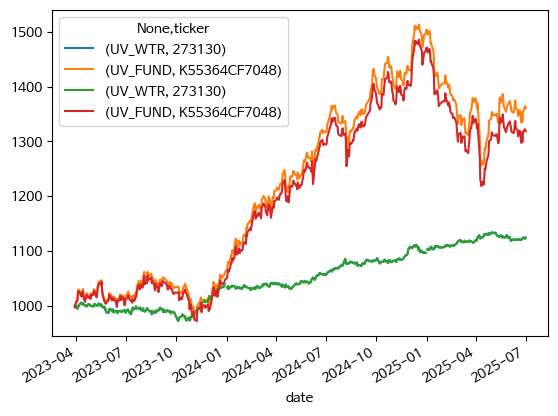

In [173]:
ax = df_p.plot()
_ = df_f.plot(ax=ax)

In [157]:
dm.cost['UV1']

KeyError: 'UV1'

In [110]:
#dm.multiverse.columns.get_level_values(0).unique()
#dm.df_multiverse['UV_WTR']
#dm.security_names['UV_FUND']
df = dm.df_multiverse
df['UV_WTR']

,069500,379800,273130,411060,148070,284430
date,,,,,,
2022-01-03,36851.0,12546.0,107985.0,10255.0,110117.0,13350.0
2022-01-04,36826.0,12616.0,107895.0,10165.0,110085.0,13315.0
2022-01-05,36302.0,12581.0,107765.0,10270.0,109613.0,13250.0
2022-01-06,35938.0,12362.0,107395.0,10190.0,108580.0,13165.0
2022-01-07,36388.0,12447.0,107315.0,10155.0,108748.0,13225.0
...,...,...,...,...,...,...
2025-06-25,42070.0,19005.0,118540.0,20570.0,116365.0,14035.0
2025-06-26,41690.0,18960.0,118790.0,20510.0,116680.0,13965.0
2025-06-27,41435.0,19120.0,118790.0,20310.0,116635.0,13955.0


In [111]:
idx = pd.IndexSlice
df.loc[:, idx[:, ['273130', 'K55364CF7048']]]

,UV_WTR,UV_FUND
,273130,K55364CF7048
date,,
2022-01-03,107985.0,NaN
2022-01-04,107895.0,NaN
2022-01-05,107765.0,NaN
2022-01-06,107395.0,NaN
2022-01-07,107315.0,NaN
...,...,...
2025-06-25,118540.0,1660.6
2025-06-26,118790.0,1681.7


In [130]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
cost

33 securities from 2023-03-29 to 2025-07-01 uploaded.
Master data for 324 funds loaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded


{'buy': ticker
 K55234DF2657    0.0
 K55234DF2459    0.0
 K55301BU6139    0.0
 K55105BU1161    0.0
 K55210BU2385    0.0
                ... 
 K55210BR6480    0.0
 K55210BR6522    0.0
 K55210BR6613    0.0
 K55210BR6654    0.0
 K55235CI9634    0.0
 Name: buy, Length: 324, dtype: float64,
 'sell': ticker
 K55234DF2657    0.0
 K55234DF2459    0.0
 K55301BU6139    0.0
 K55105BU1161    0.0
 K55210BU2385    0.0
                ... 
 K55210BR6480    0.0
 K55210BR6522    0.0
 K55210BR6613    0.0
 K55210BR6654    0.0
 K55235CI9634    0.0
 Name: sell, Length: 324, dtype: float64,
 'fee': ticker
 K55234DF2657    0.4082
 K55234DF2459    0.4082
 K55301BU6139    0.6000
 K55105BU1161    0.4200
 K55210BU2385    0.4730
                  ...  
 K55210BR6480    0.3780
 K55210BR6522    0.5480
 K55210BR6613    0.5380
 K55210BR6654    0.7080
 K55235CI9634    0.4120
 Name: fee, Length: 324, dtype: float64,
 'tax': ticker
 K55234DF2657    0.0
 K55234DF2459    0.0
 K55301BU6139    0.0
 K55105BU1161    0.0
 K552

In [96]:
k200.security_names

{'005930': '삼성전자',
 '000660': 'SK하이닉스',
 '207940': '삼성바이오로직스',
 '373220': 'LG에너지솔루션',
 '005380': '현대차',
 '105560': 'KB금융',
 '035420': 'NAVER',
 '000270': '기아',
 '034020': '두산에너빌리티',
 '012450': '한화에어로스페이스',
 '068270': '셀트리온',
 '329180': 'HD현대중공업',
 '055550': '신한지주',
 '028260': '삼성물산',
 '012330': '현대모비스',
 '035720': '카카오',
 '032830': '삼성생명',
 '086790': '하나금융지주',
 '009540': 'HD한국조선해양',
 '011200': 'HMM',
 '402340': 'SK스퀘어',
 '042660': '한화오션',
 '015760': '한국전력',
 '005490': 'POSCO홀딩스',
 '064350': '현대로템',
 '138040': '메리츠금융지주',
 '000810': '삼성화재',
 '096770': 'SK이노베이션',
 '267260': 'HD현대일렉트릭',
 '259960': '크래프톤',
 '316140': '우리금융지주',
 '051910': 'LG화학',
 '010130': '고려아연',
 '033780': 'KT&G',
 '034730': 'SK',
 '024110': '기업은행',
 '006400': '삼성SDI',
 '010140': '삼성중공업',
 '030200': 'KT',
 '323410': '카카오뱅크',
 '018260': '삼성에스디에스',
 '003550': 'LG',
 '352820': '하이브',
 '066570': 'LG전자',
 '017670': 'SK텔레콤',
 '006800': '미래에셋증권',
 '079550': 'LIG넥스원',
 '272210': '한화시스템',
 '086280': '현대글로비스',
 '003230': '삼양식품',
 '